<center><img src="https://cdnsimg.scdn3.secure.raxcdn.com/static/files/201705/2b3/skywalker-bazaarNEWLOGO.jpg_2b348bc6256ae4b637a797b70a6d805287f469e8.jpg" /></center>


#### Prephase: Loading Libraries and Start Working With Data. 
- Global Libraries : `pandas`  <a href = "https://pandas.pydata.org" target="_blank"> (Data analysis Library) </a>|| `numpy` <a href = "https://numpy.org" target="_blank"> (Scientific Computing Libraby) </a>

- Private Libraries: `sql_connect` <a href = "https://docs.microsoft.com/en-us/sql/connect/python/python-driver-for-sql-server?view=sql-server-ver15" target="_blank"> (connects with sql server using ODBC Driver) </a>

- Local Libraries: `excel` <a href = "https://xlsxwriter.readthedocs.io" target="_blank"> (exports data to excel) </a>  || `scrap` <a href = "https://www.crummy.com/software/BeautifulSoup/bs4/doc/" target="_blank"> (a Web Scrap Tool Used to find Online Prices ) </a> || `slack` <a href = "https://api.slack.com/tutorials/tags/cool-tricks" target="_blank"> (a slack specific tool to send files and messages using a BOT) </a> || `sql` <a href = "https://docs.microsoft.com/en-US/sql/t-sql/queries/select-transact-sql?view=sql-server-ver15" target="_blank"> (contains direct queries to sql database using SELECT) </a> || `plot` <a href = "https://matplotlib.org" target="_blank"> (returns data as graph) </a> 



In [1]:
import pandas as pd
import numpy as np
from DISCORD.BAZAAR import excel, scrap, slack, sql, plot
from Private import sql_connect
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pd.set_option('display.max_rows', None)

## <center> STEP 1 </center>

- Think about how my excel file will be named: **output_file**
- Think about where i want to store my file: **path_to_file**
- Set my Suppliers Name as it is in My Database: **main_name**

In [2]:
output_file = 'Bazaar.xlsx'
path_to_file = f'/Users/kommas/OneDrive/Business_Folder/Slack/Multiple_emails/{output_file}'
main_name = 'Bazaar A.E.'

## <center> STEP 2 </center>

- Read the sql query from my local library and store results to a `Dataframe` using pandas library name the variable: **sql_answer_bazaar** 
- Isolate Brands, store results in **unique_brands**
- Find `MEAN` Markup per Brand, store results in a `var` named: **markup_per_brand**
- Isolate Barcodes in `var`: **barcode_lista**

In [3]:
sql_answer_bazaar = pd.read_sql_query(sql.private_database_query(main_name), sql_connect.connect())

OPEN VPN CONNECTION FIRST
is VPN OK? Press 11


In [4]:
unique_brands = sql_answer_bazaar['BRAND'].unique()

In [5]:
markup_per_brand= [round(sql_answer_bazaar['ΚΕΡΔΟΦΟΡΙΑ'][sql_answer_bazaar['BRAND'] == i].mean() * 100, 2) for i in unique_brands]

In [6]:
barcode_lista = sql_answer_bazaar['BARCODE']

## <center> STEP 3 </center>

- Choose Shops to Scrap Data (`scrap.a = BAZAAR`, `scrap.b = ΑΒ. Βασιλόπουλος`, `scrap.e = Care Market`)
- Find Prices for every shop in the list

In [7]:
scrap.shops = [scrap.a, scrap.b, scrap.e]
out = scrap.calculate_prices(barcode_lista)


BAZAAR Start: 19:38:44
LOADING:[██████████████████████████████████████████████████]100%	 HACKING	 [7702018866984]	 
ΑΒ. Βασιλόπουλος Start: 19:40:43
LOADING:[██████████████████████████████████████████████████]100%	 HACKING	 [7702018866984]	 
Care Market Start: 19:42:09
LOADING:[██████████████████████████████████████████████████]100%	 HACKING	 [7702018866984]	 


## <center> STEP 4 </center>

- Assign Results to Dataframe
- Isolate Prices

In [8]:
sql_answer_bazaar['ΤΙΜΗ BAZAAR'] = out['BAZAAR']
sql_answer_bazaar['TIMH ΒΑΣΙΛΟΠΟΥΛΟΣ'] = out['ΑΒ. Βασιλόπουλος']
sql_answer_bazaar['TIMH Care Market'] = out['Care Market']

In [9]:
df = sql_answer_bazaar[['ΤΙΜΗ ΛΙΑΝΙΚΗΣ', 'ΤΙΜΗ BAZAAR', 'TIMH ΒΑΣΙΛΟΠΟΥΛΟΣ', 'TIMH Care Market', 'BRAND']]

## <center> STEP 5 </center>
- Extract data to excel file
- Show the First 5 row data of the new DATAFRAME (includes new prices) using `.head()`

In [10]:
excel.export(path_to_file, sql_answer_bazaar)

In [ ]:

sql_answer_bazaar = sql_answer_bazaar.sort_values(by='ΚΕΡΔΟΦΟΡΙΑ')
sql_answer_bazaar

In [34]:
## <center> STEP 6 </center>

- VISUALIZE DATA

,ΠΑΡΑΣΤΑΤΙΚΟ,BARCODE,ΠΕΡΙΓΡΑΦΗ,BRAND,ΠΟΣΟΤΗΤΑ,ΚΑΘΑΡΗ ΤΙΜΗ,ΤΙΜΗ ΛΙΑΝΙΚΗΣ,ΚΕΡΔΟΦΟΡΙΑ,ΤΙΜΗ BAZAAR,TIMH ΒΑΣΙΛΟΠΟΥΛΟΣ,TIMH Care Market
98,ΑΤΔ-ΑΓ-032512,8716200731041,ΝΟΥΝΟΥ 300G(-1.00€) ΜΠΙΣΚΟΤΟΚΡΕΜΑ,Nounou,4.0,2.427500,0.00,-10000.0,3.82,3.82,3.82
93,ΑΤΔ-ΑΓ-032512,5410091752422,TAFT 250ML POWER GEL TITANIUM,Taft,6.0,2.235000,0.00,-10000.0,6.65,0.00,0.00
65,ΑΤΔ-ΑΓ-032512,5201156031879,ΗΒΗ 330MLx6 SODA WATER SLEEK,Ήβη,8.0,1.547500,0.00,-10000.0,1.98,2.72,0.00
52,ΑΤΔ-ΑΓ-032512,8015700163599,SCHWARZKOPF 350ML ΣΑΜΠΟΥΑΝ COLOR PROTECT,Schwarzkopf,12.0,1.297500,0.00,-10000.0,3.01,0.00,0.00
51,ΑΤΔ-ΑΓ-032512,8015700163537,SCHWARZKOPF 350ML ΣΑΜΠΟΥΑΝ SHINE & VITALITY,Schwarzkopf,12.0,1.297500,0.00,-10000.0,3.01,0.00,0.00
55,ΑΤΔ-ΑΓ-032512,5410316983693,Smirnoff® Βότκα Ice 275ml,Smirnoff,6.0,1.411667,1.95,1140.0,0.00,1.85,1.85
12,ΑΤΔ-ΑΓ-032512,5204458000024,Elomas® Γάλα Light Εβαπορέ 410gr,Elomas,48.0,0.560000,0.79,2484.0,0.66,0.00,0.00
17,ΑΤΔ-ΑΓ-032512,5201262800024,Μπαρμπα Στάθης® Ντομάτα στον Τρίφτη 500gr,Μπαρμπα Στάθης,12.0,0.635833,0.90,2526.0,0.90,0.90,0.00
107,ΑΤΔ-ΑΓ-032512,5201261032846,ΑΛΦΑ 250MLx12 ΜΠΥΡΑ RETRO ΦΙΑΛΗ / ΜΗ ΕΠΙΣΤΡ.,Άλφα,10.0,5.059000,7.90,2593.0,7.22,8.49,0.00
111,ΑΤΔ-ΑΓ-032512,7702018866984,Gillette® Ανταλλακτικο Fusion 4s,Gillette,10.0,8.917000,13.95,2616.0,14.49,14.48,0.00


## <center> STEP 6 </center>

- VISUALIZE DATA

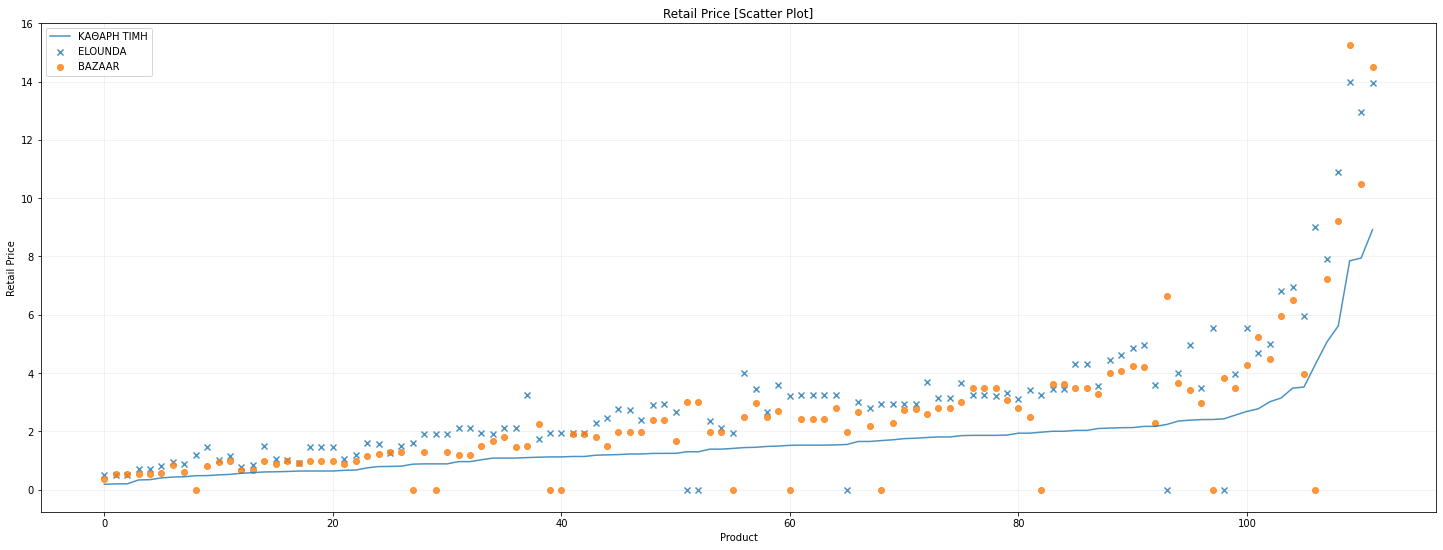

In [12]:

plt.figure(figsize=(25, 9))
plt.subplot(xlabel='Product', ylabel='Retail Price', title='Retail Price [Scatter Plot]')
plt.scatter(range(len(sql_answer_bazaar)), sql_answer_bazaar['ΤΙΜΗ ΛΙΑΝΙΚΗΣ'], marker='x', label='ELOUNDA', alpha=.8)
plt.scatter(range(len(sql_answer_bazaar)), sql_answer_bazaar['ΤΙΜΗ BAZAAR'], marker='o', label='BAZAAR', alpha=.8)
plt.plot(range(len(sql_answer_bazaar)), sql_answer_bazaar['ΚΑΘΑΡΗ ΤΙΜΗ'], label='ΚΑΘΑΡΗ ΤΙΜΗ', alpha=.8)
plt.grid(True, alpha=0.2)
plt.legend()
plt.show()

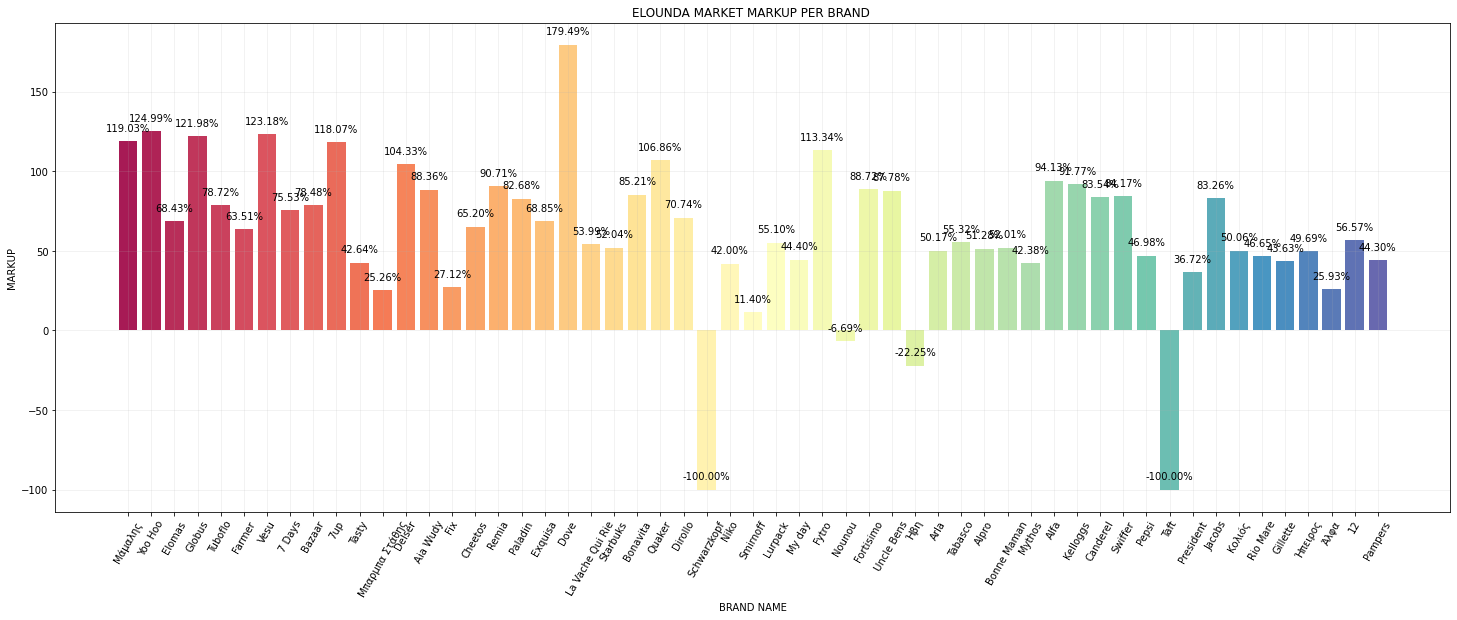

In [13]:
X = unique_brands
y = markup_per_brand
plt.figure(figsize=(25, 9))
plt.subplot(xlabel='BRAND NAME', ylabel='MARKUP', title='ELOUNDA MARKET MARKUP PER BRAND ')
plt.xticks(rotation=60)
colors = [plt.cm.Spectral(i / float(len(X))) for i in range(len(X))]
plt.bar(X, y, alpha=0.9, color=colors)
for a, b in zip(X, y):
    label = "{:.2f}%".format(b)

        # this method is called for each point
    plt.annotate(label,  # this is the text
                     (a, b),  # this is the point to label
                     textcoords="offset points",  # how to position the text
                     xytext=(0, 10),  # distance from text to points (x,y)
                     ha='center')  # horizontal alignment can be left, right or center
plt.grid(True, alpha=0.2)

## <center> STEP 7 </center>

- To get a Better feeling of `df` dataframe we use the `.describe()` method that shows a summary of the numerical attributes.

In [14]:
df.describe()

,ΤΙΜΗ ΛΙΑΝΙΚΗΣ,ΤΙΜΗ BAZAAR,TIMH ΒΑΣΙΛΟΠΟΥΛΟΣ,TIMH Care Market
count,112.000000,112.000000,112.000000,112.000000
mean,3.033304,2.493214,1.606786,0.902589
std,2.539703,2.478230,2.645854,1.650733
min,0.000000,0.000000,0.000000,0.000000
25%,1.485000,0.980000,0.000000,0.000000
50%,2.735000,1.990000,0.000000,0.000000
75%,3.505000,3.135000,2.770000,1.642500
max,14.000000,15.260000,14.990000,8.950000


###### Another quick way to get a feel of the type of data, is to plot a HISTOGRAM 

- A histogram shows the number of instances (on the vertical axes) that have a given value range (on the horizontal axis), the use of `df.hist()` method will plot a histogram for every numerical attribute.

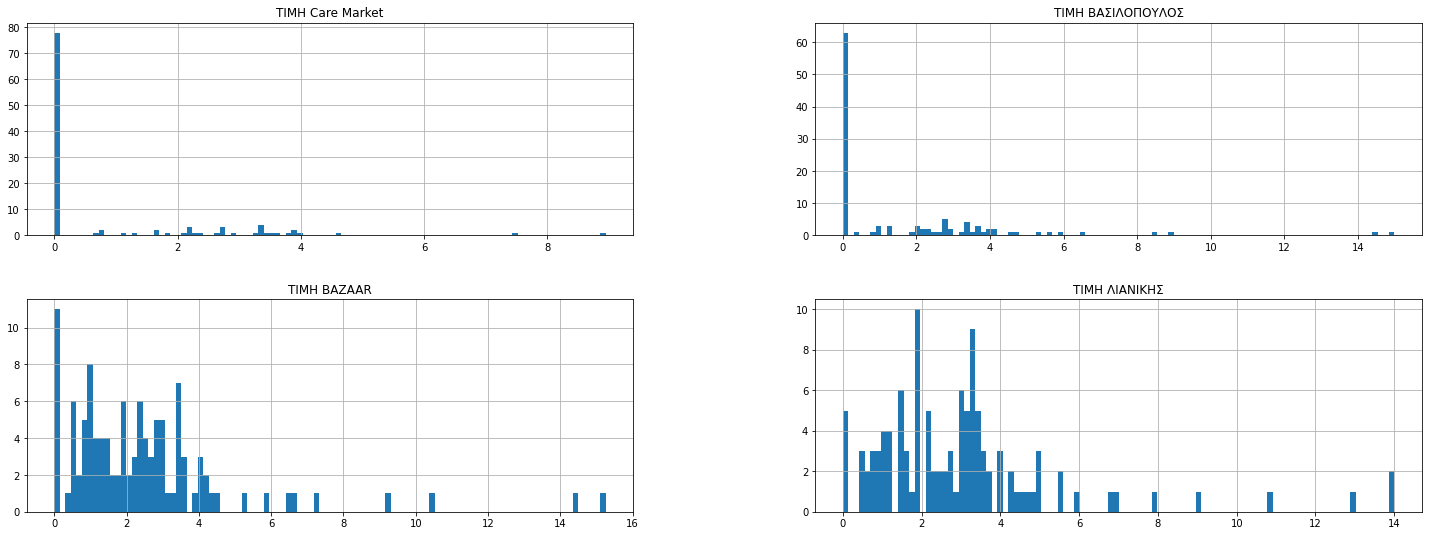

In [15]:
df.hist(bins=100,figsize=(25,9))
plt.show()

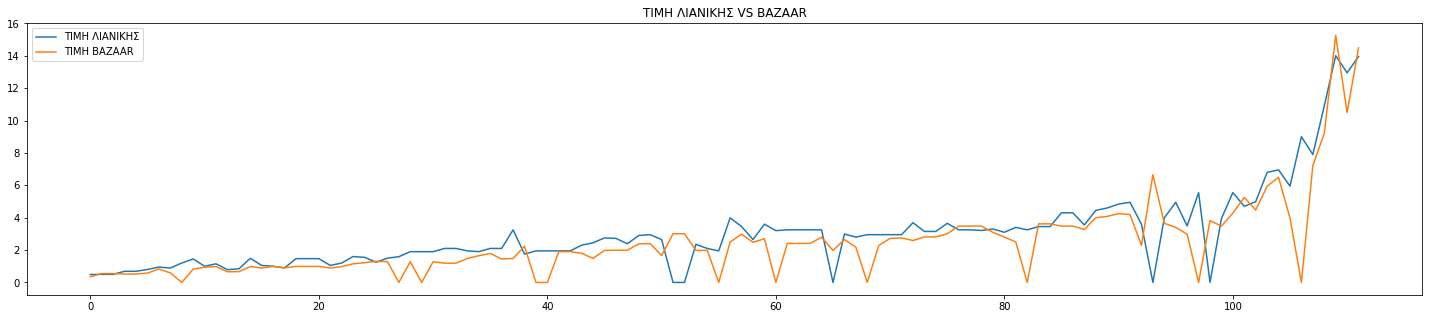

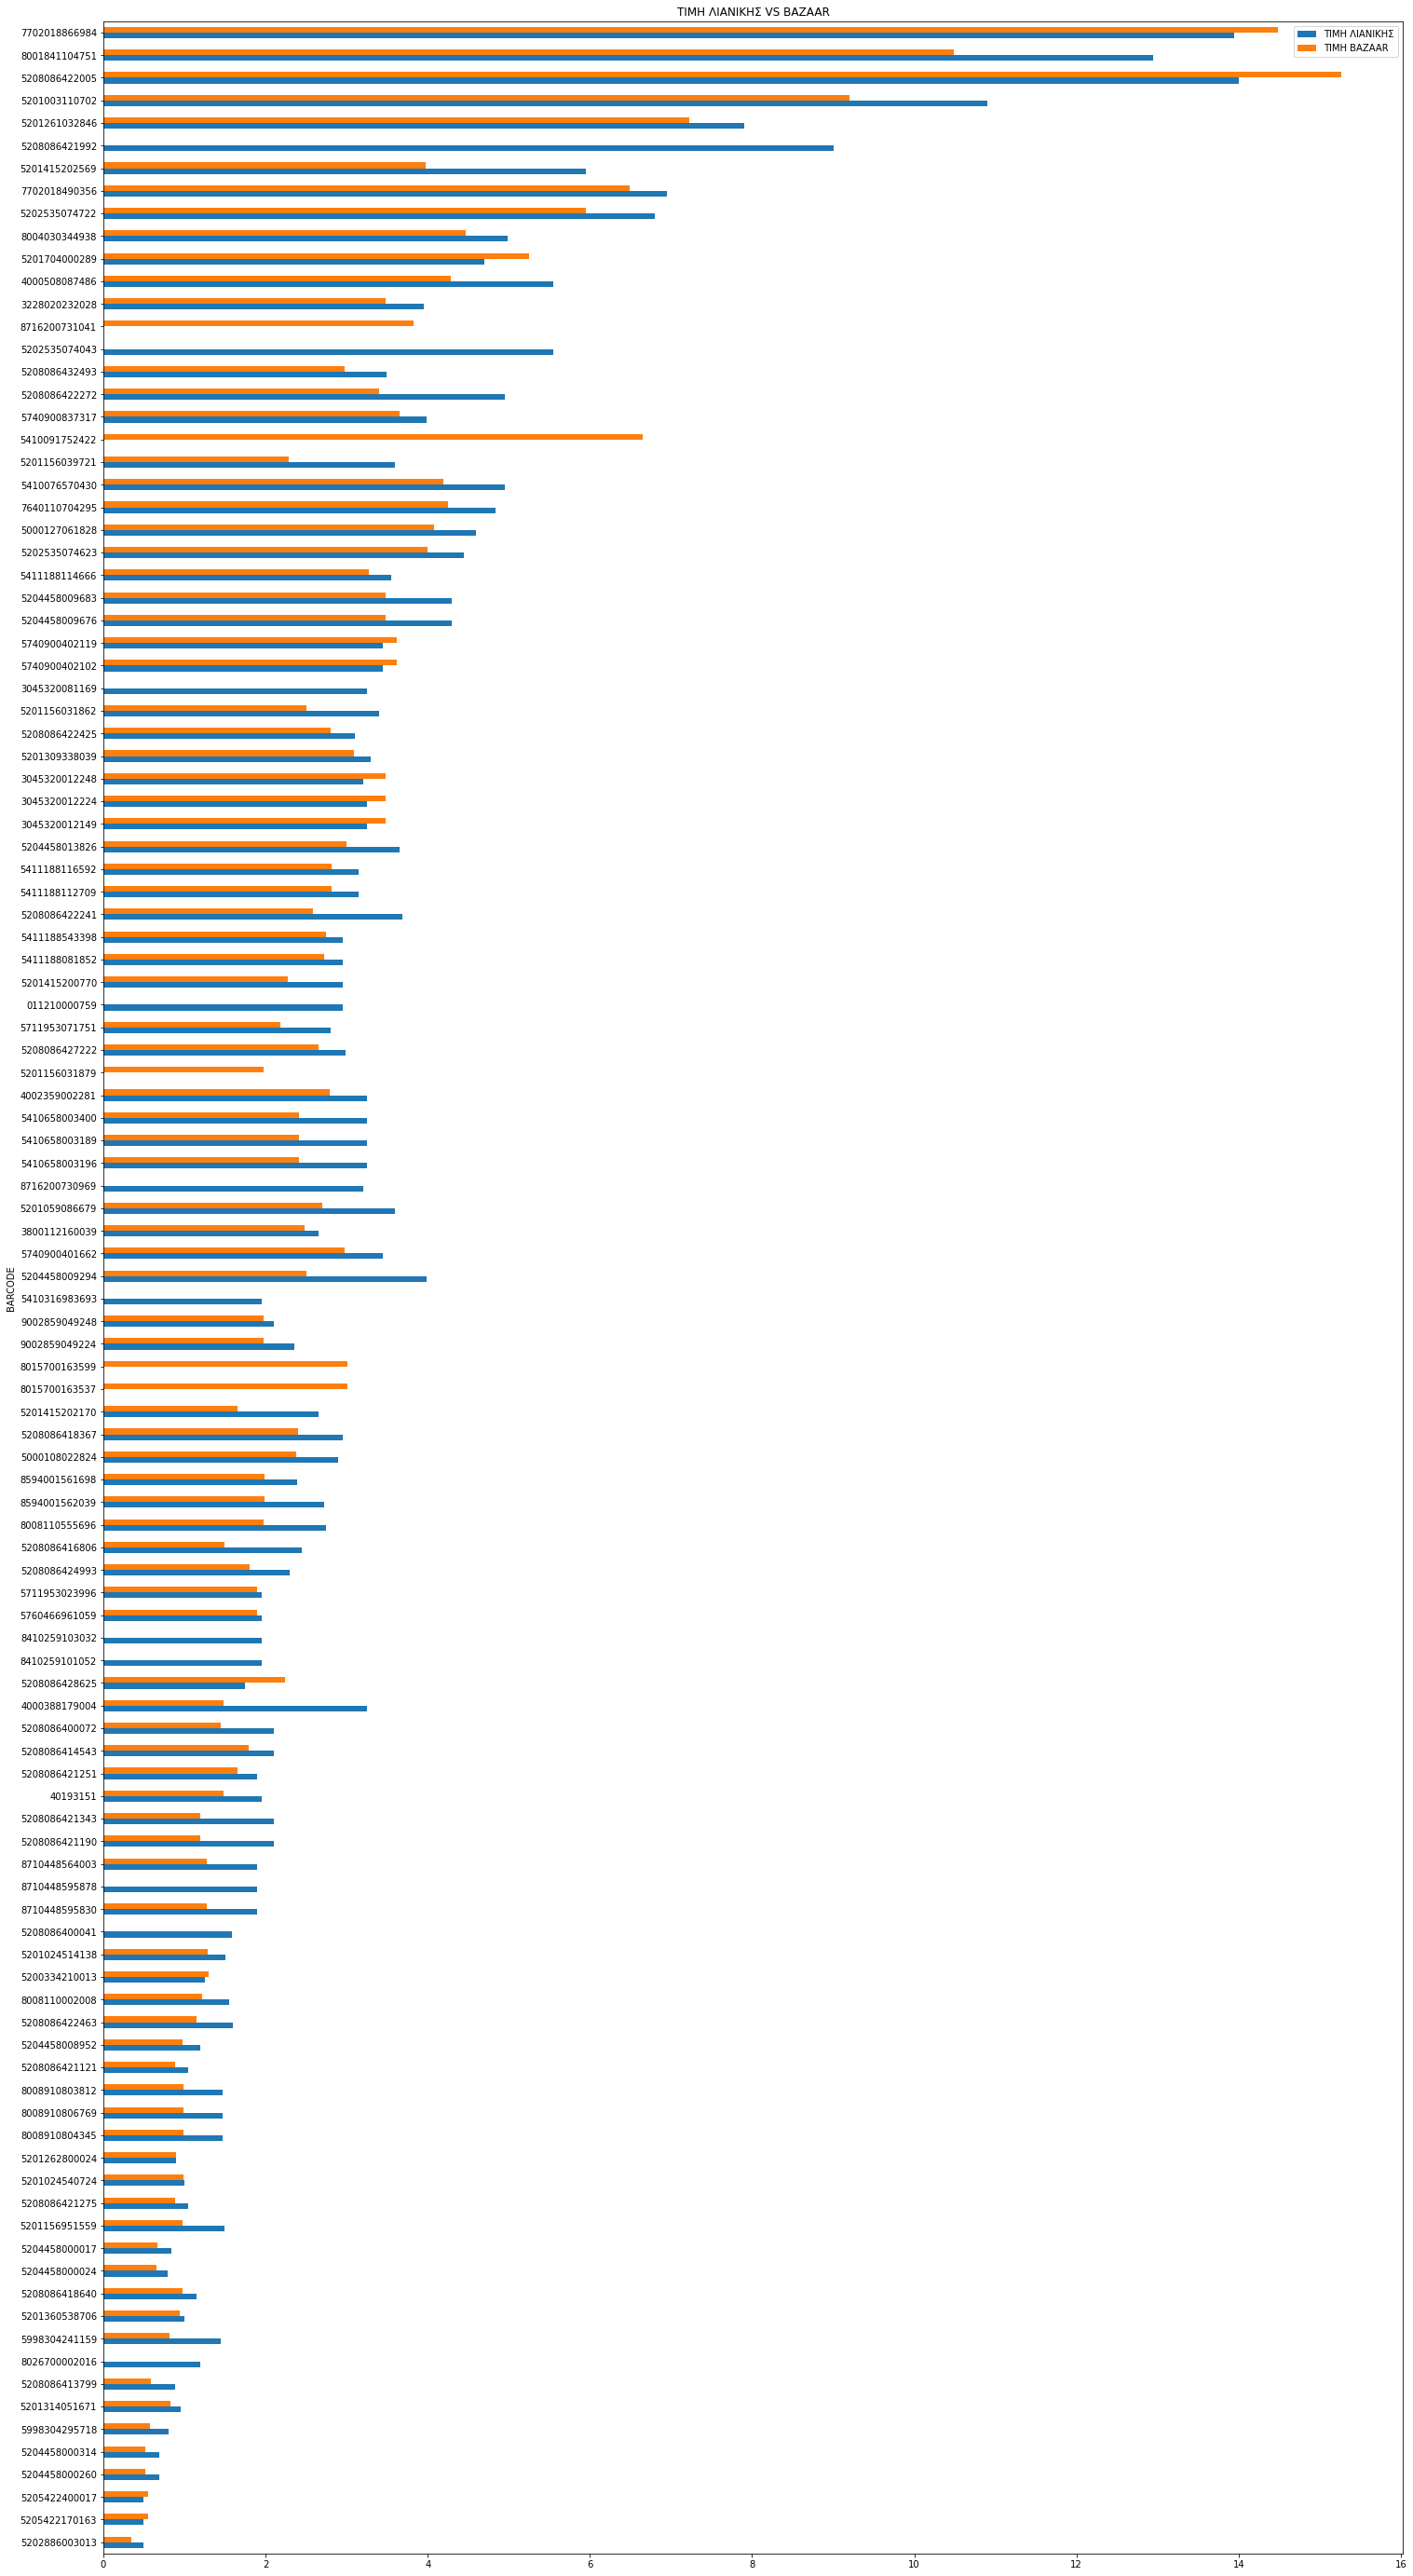

In [16]:
df[['ΤΙΜΗ ΛΙΑΝΙΚΗΣ', 'ΤΙΜΗ BAZAAR']].plot(figsize=(25,5), title='ΤΙΜΗ ΛΙΑΝΙΚΗΣ VS BAZAAR')
sql_answer_bazaar[['BARCODE', 'ΤΙΜΗ ΛΙΑΝΙΚΗΣ', 'ΤΙΜΗ BAZAAR']].set_index('BARCODE').plot.barh(figsize=(25,50), title='ΤΙΜΗ ΛΙΑΝΙΚΗΣ VS BAZAAR')
plt.show()